# Assignment 2 -  Linear probability, Logit, and Probit Models

* In this project, the relationship between the high rating of more than 250 hotels in Berlin, Germany, and independent variables such as the hotel's nightly price, distance to the center, number of stars, number of reviews, and discount offer status is examined by establishing linear probability, logit and probit models.

In [818]:
# importing libraries

from pathlib import Path
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import logistic
from scipy.stats import norm
from stargazer.stargazer import Stargazer
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from py_helper_functions import *
from statsmodels.iolib.summary2 import summary_col

warnings.filterwarnings("ignore")

In [819]:
# reading the whole hotel's data of Europe
df = pd.DataFrame(pd.read_csv("hotelbookingdata.csv"))
df

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149961,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,119,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2017,11,0,0
149962,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2018,4,1,0
149963,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2018,3,1,0
149964,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,446,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2017,12,0,1


In [820]:
# filtering for Berlin
x = df.loc[df["city_actual"] == "Berlin"]
x

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
11387,Germany,Berlin,601.0,11 miles,City centre,11 miles,Stasi Prison,Berlin,77,price for 1 night,...,_ACCOM_TYPE@Hotel,4.1 /5,0,1745.0,1,15-50% offer,2017,12,0,1
11388,Germany,Berlin,601.0,11 miles,City centre,11 miles,Stasi Prison,Berlin,52,price for 1 night,...,_ACCOM_TYPE@Hotel,4.1 /5,0,1745.0,1,15-50% offer,2018,2,1,0
11389,Germany,Berlin,601.0,11 miles,City centre,11 miles,Stasi Prison,Berlin,60,price for 1 night,...,_ACCOM_TYPE@Hotel,4.1 /5,0,1745.0,1,15-50% offer,2017,11,1,0
11390,Germany,Berlin,601.0,11 miles,City centre,11 miles,Stasi Prison,Berlin,52,price for 1 night,...,_ACCOM_TYPE@Hotel,4.1 /5,0,1745.0,1,15-50% offer,2018,6,1,0
11391,Germany,Berlin,601.0,11 miles,City centre,11 miles,Stasi Prison,Berlin,54,price for 1 night,...,_ACCOM_TYPE@Hotel,4.1 /5,0,1745.0,1,15-50% offer,2018,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15750,Germany,Berlin,38.0,1.9 miles,City centre,2.8 miles,Stasi Prison,Wilmersdorf,114,price for 1 night,...,_ACCOM_TYPE@Pension,3.5 /5,1,2323.0,0,0% no offer,2018,3,1,0
15751,Germany,Berlin,38.0,1.9 miles,City centre,2.8 miles,Stasi Prison,Wilmersdorf,80,price for 1 night,...,_ACCOM_TYPE@Pension,3.5 /5,1,2323.0,0,0% no offer,2018,2,1,0
15752,Germany,Berlin,38.0,1.9 miles,City centre,2.8 miles,Stasi Prison,Wilmersdorf,80,price for 1 night,...,_ACCOM_TYPE@Pension,3.5 /5,1,2323.0,0,0% no offer,2018,1,1,0
15753,Germany,Berlin,38.0,1.9 miles,City centre,2.8 miles,Stasi Prison,Wilmersdorf,63,price for 1 night,...,_ACCOM_TYPE@Pension,3.5 /5,1,2323.0,1,15-50% offer,2017,12,0,1


In [821]:
# Berlin has 575 unique hotels
y = x["hotel_id"].unique()
len(y)

575

In [822]:
# merging price and features csvs (different datasets) based on hotel_id column
df_all = pd.merge(pd.read_csv("hotels-europe_features.csv"), pd.read_csv("hotels-europe_price.csv"), on="hotel_id")

In [823]:
# filtering Berlin in merged dataset
df_berlin = df_all.loc[df_all["city_actual"] == "Berlin"]
df_berlin

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,accommodation_type,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
11276,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,Hotel,77,1,15-50% offer,2017,12,0,1,1,0
11277,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,Hotel,52,1,15-50% offer,2018,2,1,0,1,0
11278,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,Hotel,60,1,15-50% offer,2017,11,1,0,1,0
11279,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,Hotel,52,1,15-50% offer,2018,6,1,0,1,0
11280,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,Hotel,54,1,15-50% offer,2018,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,Pension,114,0,0% no offer,2018,3,1,0,1,1
15609,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,Pension,80,0,0% no offer,2018,2,1,0,1,1
15610,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,Pension,80,0,0% no offer,2018,1,1,0,1,1
15611,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,Pension,63,1,15-50% offer,2017,12,0,1,1,1


In [824]:
# dropping NULL values in the dataset
df_berlin = df_berlin.dropna(how="any")

In [825]:
# checking unique rating values
df_berlin["rating"].value_counts()

rating
4.0    593
3.7    493
4.5    470
4.4    457
4.1    441
3.9    321
3.5    320
4.3    277
4.6    147
3.2    145
3.0    144
3.4    117
4.8     52
2.7     32
2.5     26
2.9     25
2.0     17
4.9     14
2.4     14
5.0     12
1.5     10
2.2      8
Name: count, dtype: int64

In [826]:
# filtering hotels who have more than 4.0 rating and creating binary variable "highly_rated"
df_berlin["highly_rated"] = 0
df_berlin.loc[df_berlin["rating"] >= 4.0, "highly_rated"] = 1 # highly_rated=1 

In [827]:
df_berlin["highly_rated"].value_counts()

highly_rated
1    2463
0    1672
Name: count, dtype: int64

In [828]:
df_berlin = df_berlin.dropna(how="any")

In [829]:
# creating binary variable "endline" for filtering 2018 
df_berlin["endline"] = 0
df_berlin.loc[df_berlin["year"] == 2018, "endline"] = 1
df_berlin

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline
11276,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2017,12,0,1,1,0,1,0
11277,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,2,1,0,1,0,1,1
11278,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2017,11,1,0,1,0,1,0
11279,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,6,1,0,1,0,1,1
11280,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,3,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,3,1,0,1,1,0,1
15609,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,2,1,0,1,1,0,1
15610,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,1,1,0,1,1,0,1
15611,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,1,15-50% offer,2017,12,0,1,1,1,0,0


In [830]:
# creating a binary variable = "temp" which equals 1 if the year 2018 and hotels highly rated 
df_berlin["temp"] = np.where(
    df_berlin["endline"] == 1, np.where(df_berlin["highly_rated"] == 1, 1, 0), np.nan
)

In [831]:
df_berlin["temp"].value_counts()

temp
1.0    1397
0.0     902
Name: count, dtype: int64

In [832]:
df_berlin.head(20)

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline,temp
11276,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2017,12,0,1,1,0,1,0,NaN
11277,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,2,1,0,1,0,1,1,1.0
11278,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2017,11,1,0,1,0,1,0,NaN
11279,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,6,1,0,1,0,1,1,1.0
11280,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,3,1,0,1,0,1,1,1.0
11281,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,4,1,0,1,0,1,1,1.0
11282,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2017,11,0,0,1,0,1,0,NaN
11283,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,5,1,0,1,0,1,1,1.0
11284,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,1,1,0,1,0,1,1,1.0
11285,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1-15% offer,2018,1,1,0,1,0,0,1,0.0


In [833]:
# group by "hotel_id" and "temp" for "highly_rated" column
df_berlin["highly_rated"] = df_berlin.groupby("hotel_id")["temp"].transform(np.nanmax)
#.nanmax: Return the maximum of an array or maximum along an axis, ignoring any NaNs.

In [834]:
df_berlin.head(20)

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline,temp
11276,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2017,12,0,1,1,0,1.0,0,NaN
11277,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,2,1,0,1,0,1.0,1,1.0
11278,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2017,11,1,0,1,0,1.0,0,NaN
11279,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,6,1,0,1,0,1.0,1,1.0
11280,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,3,1,0,1,0,1.0,1,1.0
11281,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,4,1,0,1,0,1.0,1,1.0
11282,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2017,11,0,0,1,0,1.0,0,NaN
11283,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,5,1,0,1,0,1.0,1,1.0
11284,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,15-50% offer,2018,1,1,0,1,0,1.0,1,1.0
11285,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1-15% offer,2018,1,1,0,1,0,0.0,1,0.0


In [835]:
# dropping "temp" column
df_berlin = df_berlin.drop("temp", axis=1)

In [836]:
df_berlin

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline
11276,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2017,12,0,1,1,0,1.0,0
11277,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,2,1,0,1,0,1.0,1
11278,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2017,11,1,0,1,0,1.0,0
11279,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,6,1,0,1,0,1.0,1
11280,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,3,1,0,1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,3,1,0,1,1,0.0,1
15609,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,2,1,0,1,1,0.0,1
15610,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,1,1,0,1,1,0.0,1
15611,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,1,15-50% offer,2017,12,0,1,1,1,0.0,0


In [837]:
# filter the columns who have a binary variable for "highly_rated"
df_berlin = df_berlin.loc[lambda x: (x["highly_rated"] == 1) | (x["highly_rated"] == 0)]

In [838]:
# filtering the data frame for 2018
df_berlin = df_berlin.loc[lambda x: x["endline"] == 1]

In [839]:
df_berlin

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline
11277,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,2,1,0,1,0,1.0,1
11279,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,6,1,0,1,0,1.0,1
11280,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,3,1,0,1,0,1.0,1
11281,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,4,1,0,1,0,1.0,1
11283,1745,Berlin,11.0,3.5,4.1,Germany,Berlin,601.0,City centre,Stasi Prison,...,1,15-50% offer,2018,5,1,0,1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15604,2322,Berlin,1.9,3.0,3.0,Germany,Berlin,19.0,City centre,Stasi Prison,...,0,0% no offer,2018,1,1,0,1,1,0.0,1
15608,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,3,1,0,1,1,0.0,1
15609,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,2,1,0,1,1,0.0,1
15610,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,1,1,0,1,1,0.0,1


In [840]:
# Using IQR (Interquartile Range) method to drop the outliers for distance and stars column
berlin_distance_outliers = df_berlin[
    (df_berlin['distance'] < df_berlin['distance'].quantile(0.05)) | 
    (df_berlin['distance'] > df_berlin['distance'].quantile(0.95))
]

berlin_stars_outliers = df_berlin[
    (df_berlin['stars'] < df_berlin['stars'].quantile(0.05)) | 
    (df_berlin['stars'] > df_berlin['stars'].quantile(0.95))
]

df_berlin = df_berlin.drop(berlin_distance_outliers.index.tolist() + berlin_stars_outliers.index.tolist())

In [841]:
df_berlin

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline
11285,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,1,1,0,1,0,0.0,1
11286,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,4,1,0,1,0,0.0,1
11287,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,2,1,0,1,0,0.0,1
11289,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,6,1,0,1,0,0.0,1
11292,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,3,1,0,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15604,2322,Berlin,1.9,3.0,3.0,Germany,Berlin,19.0,City centre,Stasi Prison,...,0,0% no offer,2018,1,1,0,1,1,0.0,1
15608,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,3,1,0,1,1,0.0,1
15609,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,2,1,0,1,1,0.0,1
15610,2323,Berlin,1.9,2.5,3.5,Germany,Berlin,38.0,City centre,Stasi Prison,...,0,0% no offer,2018,1,1,0,1,1,0.0,1


In [842]:
# Describe statistically the "highly_rated", "distance" and "stars" columns

df_berlin.filter(
    [   "highly_rated",
        "distance",
        "stars",
        "price",
        "rating_reviewcount",
        "offer",
        "scarce_room",
    ]
).describe().round(2)

# highly rated hotels statistic

,highly_rated,distance,stars,price,rating_reviewcount,offer,scarce_room
count,2075.00,2075.00,2075.00,2075.00,2075.00,2075.00,2075.00
mean,0.61,2.48,3.42,119.86,279.88,0.65,0.23
std,0.49,1.38,0.80,58.01,361.29,0.48,0.42
min,0.00,0.80,2.00,28.00,1.00,0.00,0.00
25%,0.00,1.50,3.00,87.00,67.00,0.00,0.00
50%,1.00,2.00,3.50,107.00,157.00,1.00,0.00
75%,1.00,3.20,4.00,137.00,363.00,1.00,0.00
max,1.00,7.10,5.00,580.00,3234.00,1.00,1.00


* Number of observations: 2075
* 61% highly rated in 2018, %65 of these hotels offer discount and %23 have scarce room
* Minimum distance from these hotels to city center is 0.8 km and they have 3.42 stars as average

In [843]:
pd.crosstab(df_berlin["accommodation_type"], df_berlin["highly_rated"])

highly_rated,0.0,1.0
accommodation_type,,
Apart-hotel,20,33
Apartment,3,52
Hostel,99,42
Hotel,597,1110
Pension,95,24


In [844]:
df_berlin.reset_index(drop=True).to_csv("Assignment2.csv")

In [845]:
df_berlin = pd.read_csv("Assignment2.csv", index_col=0)

In [846]:
df_berlin.head()

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated,endline
0,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,1,1,0,1,0,0.0,1
1,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,4,1,0,1,0,0.0,1
2,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,2,1,0,1,0,0.0,1
3,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,6,1,0,1,0,0.0,1
4,1746,Berlin,4.2,2.5,3.5,Germany,Berlin,77.0,City centre,Stasi Prison,...,1,1-15% offer,2018,3,1,0,1,0,0.0,1


**Model 1**: Estimate linear probability model
- being highly ranked in 2018 as the binary dependent variable 
- distance to city center as explanatory variable

In [847]:
lpm1 = smf.ols("highly_rated ~ distance", data=df_berlin).fit(cov_type="HC1")

In [848]:
df_berlin.dtypes

hotel_id                int64
city                   object
distance              float64
stars                 float64
rating                float64
country                object
city_actual            object
rating_reviewcount    float64
center1label           object
center2label           object
neighbourhood          object
ratingta              float64
ratingta_count        float64
distance_alter        float64
accommodation_type     object
price                   int64
offer                   int64
offer_cat              object
year                    int64
month                   int64
weekend                 int64
holiday                 int64
nnights                 int64
scarce_room             int64
highly_rated          float64
endline                 int64
dtype: object

Model 2: including hotel stars

In [849]:
lpm2 = smf.ols("highly_rated ~ distance + stars", data=df_berlin).fit(covtype="HC1")

In [850]:
stargazer = Stargazer([lpm1, lpm2])
stargazer.covariate_order(["distance", "stars", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

In [851]:
type(lpm1)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [852]:
lpm1.conf_int(alpha=0.02)

,0,1
Intercept,0.719810,0.818242
distance,-0.082437,-0.047714


**Model 1**: $highlyrated^P=\alpha+\beta distance$
- $\alpha$: 77% of hotels whose locations at the center of city rated highly ($distance=0$)
- $\beta$: As the hotel location moves 1 km away from the center, the probability of being highly rated decreases by 6.5%


estimates are statistically significant at 1%
- statistically different from 0, so we can be 99% confident that As the hotel location moves away from the center, the probability that the public will rate the hotel highly decreases.
- we can be 99% confident that the the population is likely to rate hotels 4% to 8% lower as hotels move further away from the centre.

Note - population: People stayed in a Berlin Hotel in 2018

**Model 2**: $highlyrated^P=\beta_0+\beta_1 distance +\beta_2 stars$


-> For hotels located right in the center, as the number of stars increases by 1, the probability of being highly rated increases by 26.6%.

->Since there is no situation where the star is equal to 0, we cannot make an inference about this.

-> statistically significant at 1%, generalizable to the population


*******Highly Rated - Distance and Stars******* – scatterplot and regression line

We want to show the scatterplot and the regression line that correspond to **Model 1**

In [853]:
df_berlin["pred1"] = lpm1.predict()

In [854]:
pd.crosstab(index=df_berlin["pred1"], columns=df_berlin["distance"])

distance,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,...,5.5,5.6,5.7,5.9,6.0,6.2,6.3,6.4,6.5,7.1
pred1,,,,,,,,,,,,,,,,,,,,,
0.306990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
0.346035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
0.352542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,0,0
0.359050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
0.365558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0.378573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
0.385080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,0,0,0,0,0,0
0.398095,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
0.404603,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0


In [855]:
pd.crosstab(index=df_berlin["highly_rated"], columns=df_berlin["distance"])

distance,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,...,5.5,5.6,5.7,5.9,6.0,6.2,6.3,6.4,6.5,7.1
highly_rated,,,,,,,,,,,,,,,,,,,,,
0.0,12,8,32,28,51,8,22,37,27,14,...,17,8,6,9,6,1,0,11,6,19
1.0,29,21,70,85,60,44,17,36,54,88,...,0,0,0,0,5,0,12,0,5,0


In [856]:
pd.crosstab(index=df_berlin["highly_rated"], columns=df_berlin["stars"])

stars,2.0,2.5,3.0,3.5,4.0,4.5,5.0
highly_rated,,,,,,,
0.0,149,61,424,60,117,3,0
1.0,59,75,243,167,488,87,142


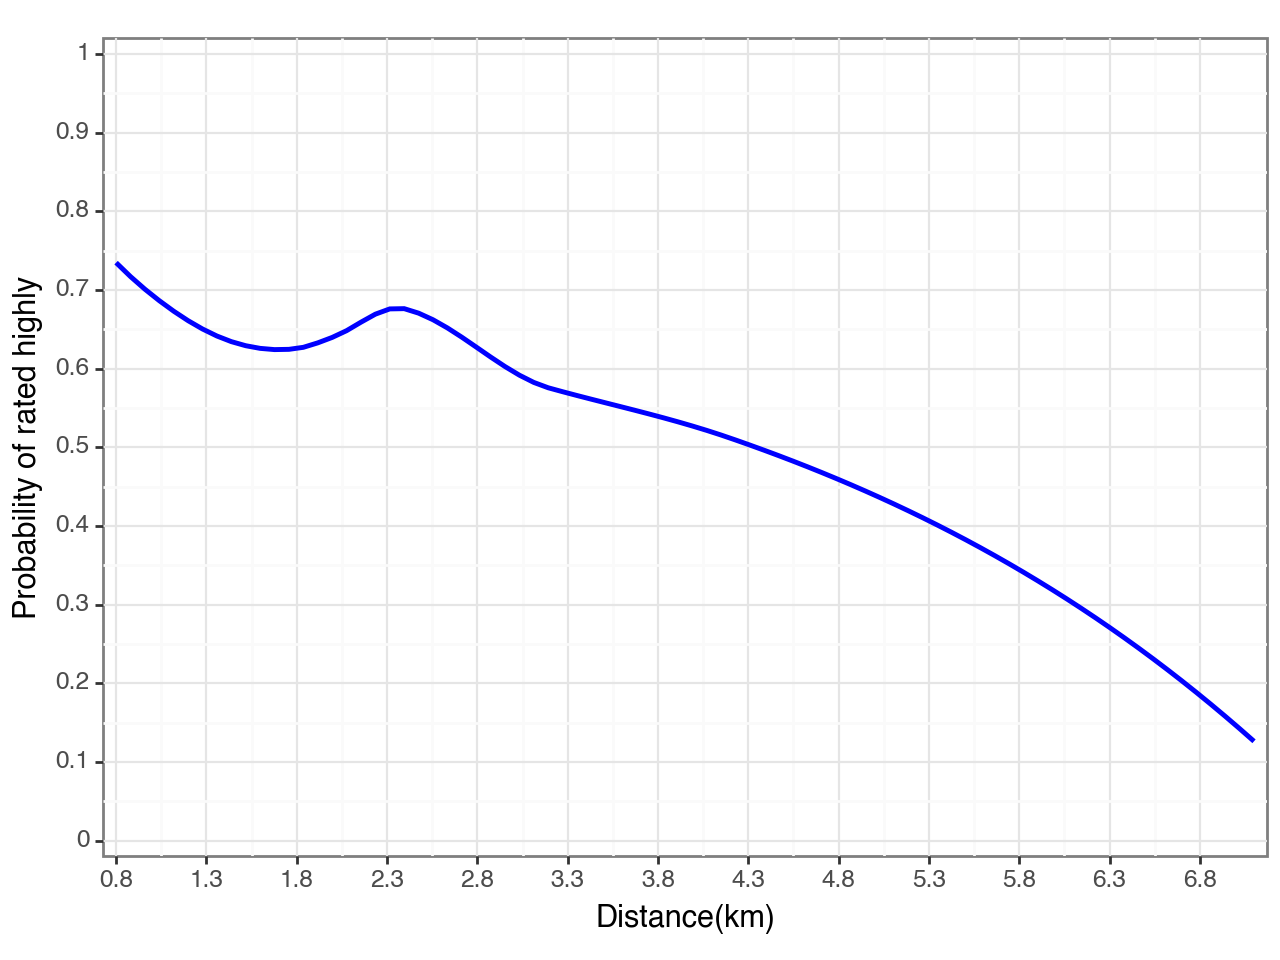

<Figure Size: (640 x 480)>

In [857]:
g1 = (
    ggplot(data=df_berlin)
    + geom_smooth(
        aes(x="distance", y="highly_rated"), method="loess", se=False, color="Blue"
    )
    + labs(x="Distance(km)", y="Probability of rated highly")
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0.8, 7.1], breaks=np.arange(0.8, 7.1, 0.5))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + theme_bw()
)
g1

* In general, when there is movement away from the center, there is a decrease in the rate of being highly rated. The plot has two knots at 1.7 and 2.4 km.

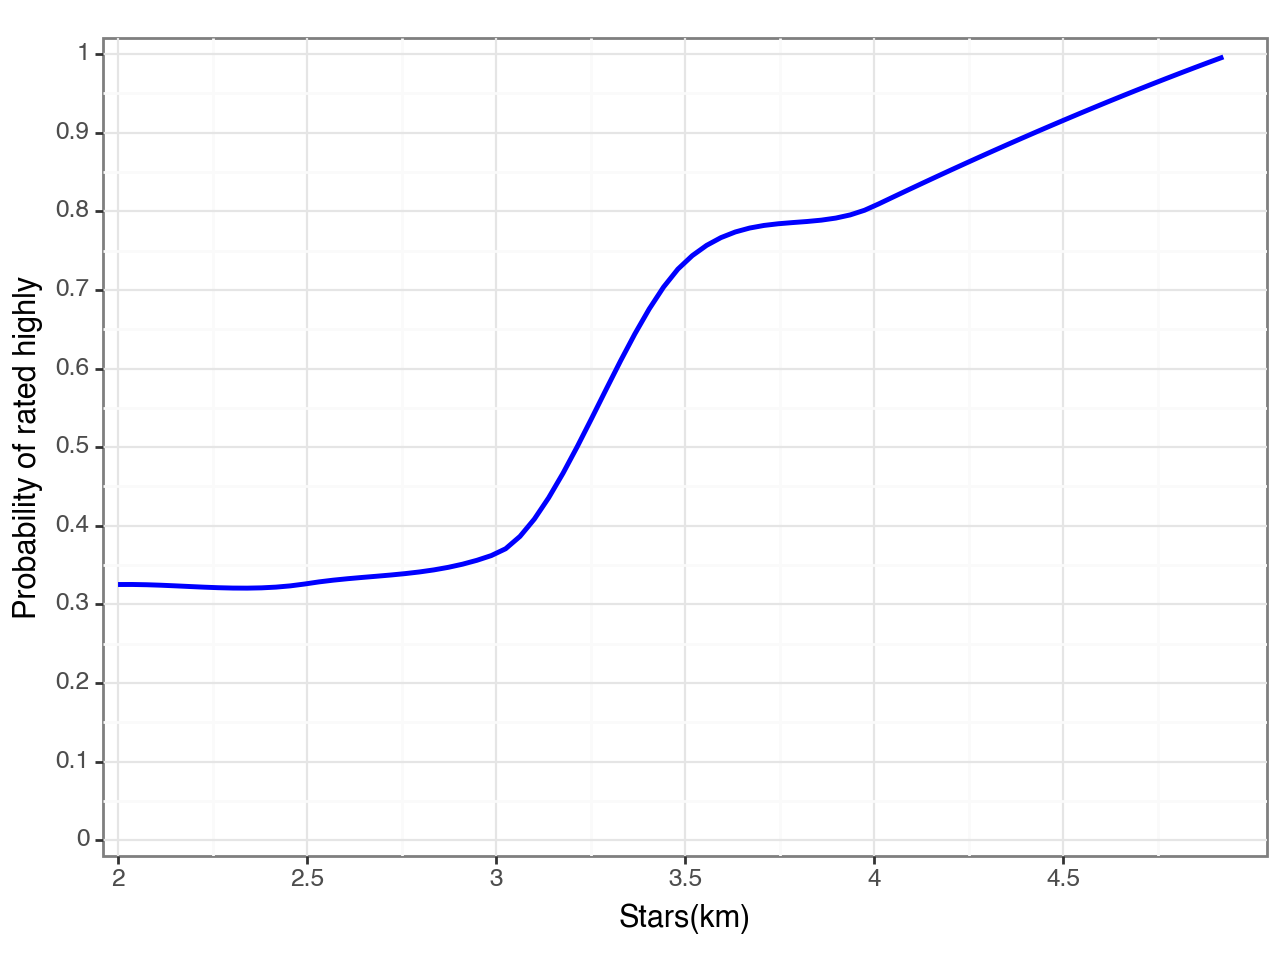

<Figure Size: (640 x 480)>

In [858]:
g2 = (
    ggplot(data=df_berlin)
    + geom_smooth(
        aes(x="stars", y="highly_rated"), method="loess", se=False, color="Blue"
    )
    + labs(x="Stars(km)", y="Probability of rated highly")
    + scale_x_continuous(expand=[0.01, 0.01], limits=[2, 5], breaks=np.arange(2, 5, 0.5))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + theme_bw()
)
g2

* While the number of stars of the hotel is not very effective in being highly rated until 0-3, this rate increases significantly after 3 stars.

# LPM & PREDICTION

Accommodation type as categorical

In [859]:
df_berlin["accommodation_type"] = df_berlin["accommodation_type"].astype("category")

In [860]:
lpm3 = smf.ols(
        "highly_rated ~ distance + stars + price + rating_reviewcount + offer + scarce_room + accommodation_type",
    df_berlin,
).fit(covtype="HC1")

In [861]:
stargazer = Stargazer([lpm3])
stargazer.covariate_order(
    [
        "distance",
        "stars",
        "price",
        "rating_reviewcount",
        "offer",
        "scarce_room",
    ]
)
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.add_line("accommodation_type indicators", ["Yes"])
stargazer

**Model 3**: Conditioning on other variables
- coefficient on distance is --0.035* -> comparing people who stays in hotels with same price, number of review, offer and have same number of scarce_room tends to rate %3.5 less for each km hotel location moves from city center. This result is quite near what is found in the first regression (0.035)

-> statistically significant at 1%, 99% CI [-0.077, 0.074]: since the 0 coefficient is in the range we can't make this deduction for population.

- coefficient on stars: conditioning on other characteristics included in the regression, if hotel stars increase 1 point these hotels 22% more likely to be rated highly

- hotel price and rating_reviewcount does not matter

- If a hotel offers a discount, it has a higher rating probability of 5.4%, while hotels with scarce rooms have a lower probability of being rated by 9.2%.


In [862]:
df_berlin["pred_lpm"] = lpm3.predict()

In [863]:
df_berlin["pred_lpm"].describe().round(4)

count    2075.0000
mean        0.6077
std         0.2448
min        -0.0686
25%         0.4233
50%         0.6031
75%         0.7809
max         1.4455
Name: pred_lpm, dtype: float64

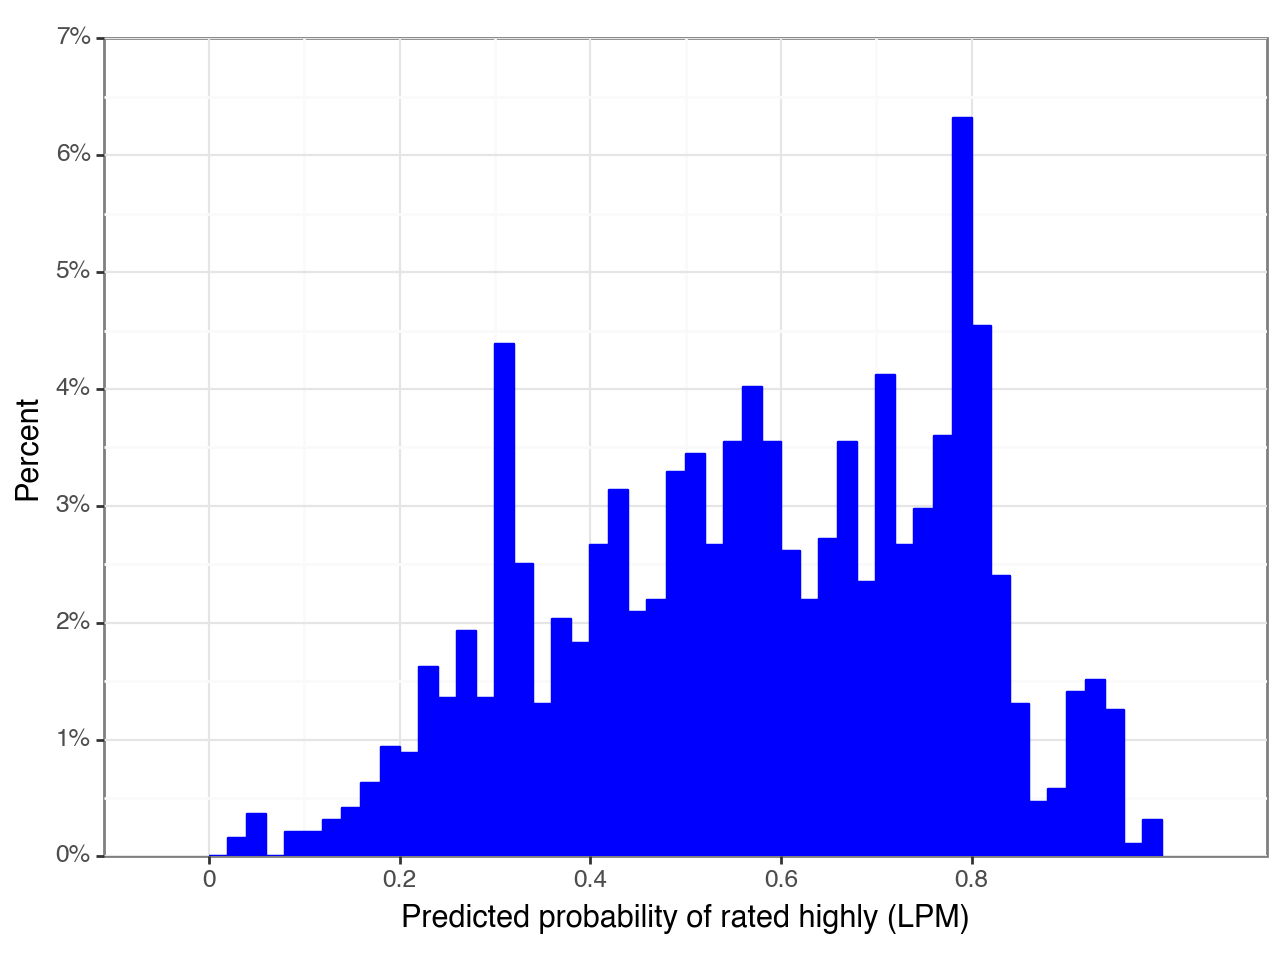

In [864]:
color = ["blue"]

g3 = (
    ggplot(df_berlin, aes(x="pred_lpm"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        binwidth=0.02,
        center=0.65,
        color="blue",
        fill=color[0],
        closed="right",
    )
    + labs(x="Predicted probability of rated highly (LPM)", y="Percent")
    + scale_y_continuous(
        expand=[0.00, 0.0],
        limits=[0, 0.07],
        breaks=np.arange(0, 0.07, 0.01),
        labels=percent_format(),
    )
    + scale_x_continuous(expand=[0.1, 0.01], limits=[0, 1], breaks=np.arange(0, 1, 0.2))
    + theme_bw()
)

print(g3)


Differences in predicted probabilities (of rated highly) come from differences in the values of the explanatory variables in the regression

We want to look at the characteristics of the people in bottom 1%

In [865]:
cuts = 100
df_berlin["q100_pred_lpm"], bins = pd.qcut(df_berlin["pred_lpm"], q=np.linspace(0, 1, cuts + 1), duplicates='drop', retbins=True, labels=False)

In [866]:
df_berlin.loc[
    df_berlin["q100_pred_lpm"] == 1,
    ["distance", "stars", "price", "rating_reviewcount", "offer", "scarce_room"],
].describe().round(1)

# Bottom 1%

,distance,stars,price,rating_reviewcount,offer,scarce_room
count,21.0,21.0,21.0,21.0,21.0,21.0
mean,3.4,2.4,86.9,65.8,0.2,1.0
std,1.2,0.3,24.1,51.5,0.4,0.2
min,1.9,2.0,51.0,14.0,0.0,0.0
25%,2.0,2.0,75.0,28.0,0.0,1.0
50%,3.7,2.5,84.0,38.0,0.0,1.0
75%,4.2,2.5,103.0,82.0,0.0,1.0
max,5.0,3.0,145.0,163.0,1.0,1.0


- Average distance to the center is 3.4 km
- They have min 2.0 stars
- Their max price for one night is 145 Euros
- av 65.8 reviews
- 20% of them offer discount

# LOGIT VS. PROBIT MODELS

In [867]:
formula = "highly_rated ~ distance + stars + price + rating_reviewcount + offer + scarce_room + accommodation_type"

In [868]:
logit = smf.logit(formula, df_berlin).fit()


table = Stargazer([logit])
table.covariate_order(
    [
        "distance",
        "stars",
        "price",
        "rating_reviewcount",
        "offer",
        "scarce_room",
    ]
)
table

Optimization terminated successfully.
         Current function value: 0.522734
         Iterations 7


In [869]:
logit_marginal = logit.get_margeff().summary()
logit_marginal

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
===================================================================================================
                                     dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
accommodation_type[T.Apartment]     0.4266      0.120      3.552      0.000       0.191       0.662
accommodation_type[T.Hostel]        0.1582      0.070      2.264      0.024       0.021       0.295
accommodation_type[T.Hotel]         0.0343      0.058      0.591      0.555      -0.080       0.148
accommodation_type[T.Pension]      -0.1277      0.073     -1.747      0.081      -0.271       0.016
distance                           -0.0317      0.007     -4.792      0.000      -0.045      -0.019
stars                               0.2191      0.015     14.487      0.000       0.189       0.249
price                               0.0011      0.000      5.123      0.000       0.001       0.001
rating_reviewcount              -2.399e-05   3.32e-05     -0.724      0.469    -8.9e-05     4.1e-05
offer                               0.0632      0.021      3.045      0.002       0.023       0.104
scarce_room                        -0.0856      0.024     -3.576      0.000      -0.133      -0.039
===================================================================================================
"""

In [870]:
type(logit_marginal)

statsmodels.iolib.summary.Summary

In [871]:
df_berlin["pred_logit"] = logit.predict()


In [872]:
df_berlin["pred_logit"].describe()

count    2075.000000
mean        0.607711
std         0.251894
min         0.042311
25%         0.386297
50%         0.635618
75%         0.826284
max         0.998819
Name: pred_logit, dtype: float64

# Probit

In [873]:
probit = smf.probit(formula, df_berlin).fit()


table = Stargazer([probit])
table.covariate_order(
    [
        "distance",
        "stars",
        "price",
        "rating_reviewcount",
        "offer",
        "scarce_room",
    ]
)
table


Optimization terminated successfully.
         Current function value: 0.521632
         Iterations 7


In [874]:
probit_marginal = probit.get_margeff().summary()
probit_marginal

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
===================================================================================================
                                     dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
accommodation_type[T.Apartment]     0.4137      0.110      3.748      0.000       0.197       0.630
accommodation_type[T.Hostel]        0.1526      0.072      2.130      0.033       0.012       0.293
accommodation_type[T.Hotel]         0.0296      0.061      0.489      0.625      -0.089       0.148
accommodation_type[T.Pension]      -0.1231      0.073     -1.696      0.090      -0.265       0.019
distance                           -0.0310      0.007     -4.696      0.000      -0.044      -0.018
stars                               0.2203      0.015     14.725      0.000       0.191       0.250
price                               0.0011      0.000      5.568      0.000       0.001       0.001
rating_reviewcount              -2.439e-05   3.13e-05     -0.779      0.436   -8.58e-05     3.7e-05
offer                               0.0699      0.021      3.389      0.001       0.029       0.110
scarce_room                        -0.0847      0.024     -3.506      0.000      -0.132      -0.037
===================================================================================================
"""

In [875]:
df_berlin["pred_probit"] = probit.predict()

In [876]:
df_berlin["pred_probit"].describe()

count    2075.000000
mean        0.611764
std         0.250904
min         0.033780
25%         0.397823
50%         0.635929
75%         0.827315
max         0.999969
Name: pred_probit, dtype: float64

Both probit and logit have predicted probabilities (of rated highly) that range between 0.6 and 0.99

Let's show in the same graph the predicted probabilities for LPM, logit and probit:

- LPM on x-axis
- Logit and probit on y-axis

The more the predicted probabilities are close to the 45 degree line, the more logit and probit are close to LPM

In [877]:
df_plot = pd.melt(
    df_berlin[["pred_lpm", "pred_logit", "pred_probit"]].rename(
        columns={"pred_logit": "Logit", "pred_probit": "Probit"}
    ),
    value_vars=["Logit", "Probit"],
    id_vars=["pred_lpm"],
).sort_values(by=["variable"], ascending=False)

In [878]:
df_plot.head()

,pred_lpm,variable,value
2075,0.352917,Probit,0.295849
2789,0.681514,Probit,0.740481
2759,0.485744,Probit,0.463876
2760,0.439427,Probit,0.439562
2761,0.474974,Probit,0.442484


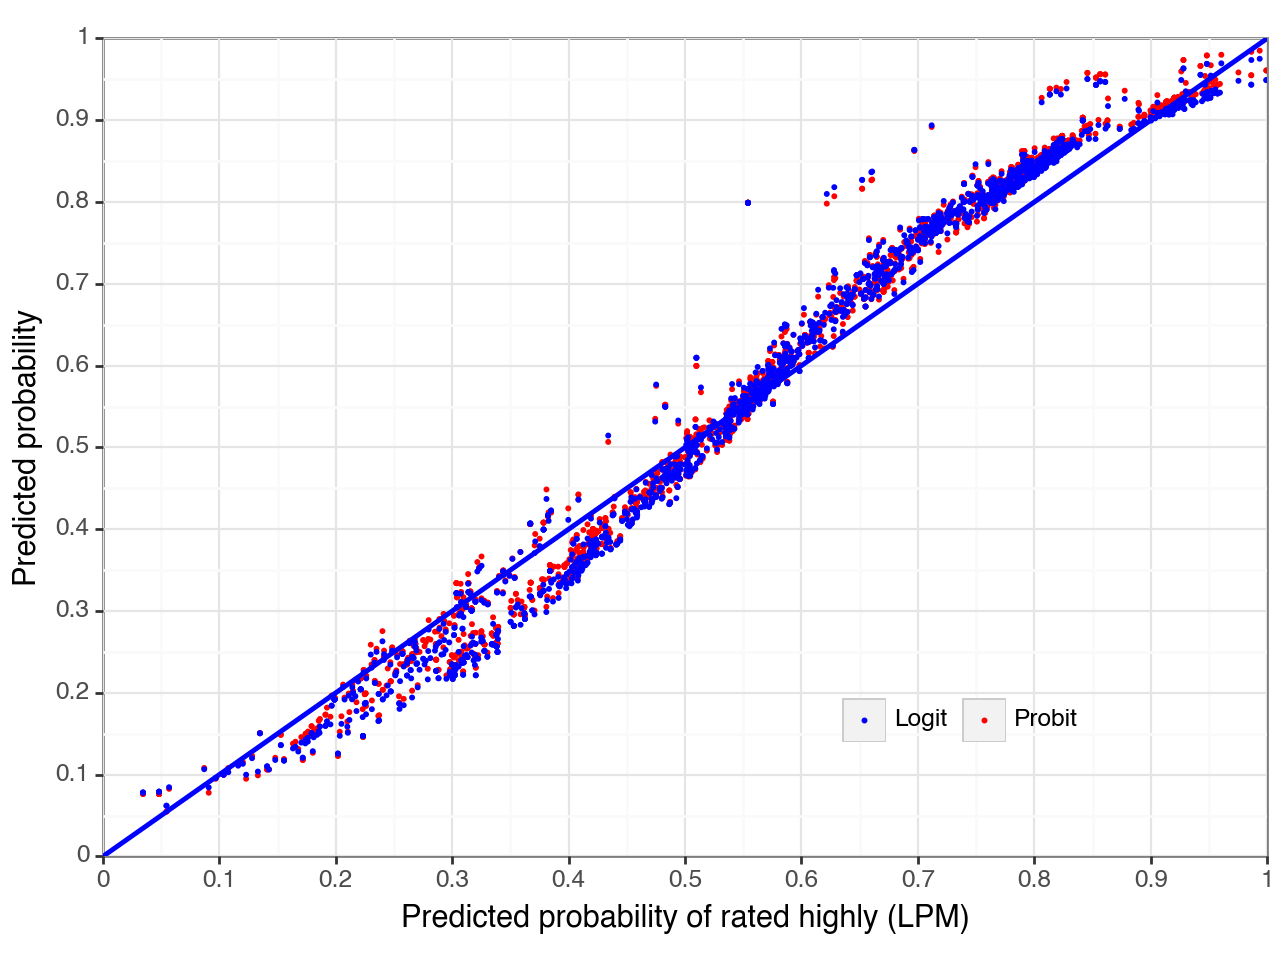

<Figure Size: (640 x 480)>

In [879]:
color = ["blue", "red"]  # Adjust the color list based on your preferences

g4 = (
    ggplot(df_plot, aes(x="pred_lpm", y="value", color="variable"))
    + geom_point(size=0.2)
    + geom_abline(color="blue", intercept=0, slope=1, size=1)
    + labs(
        x="Predicted probability of rated highly (LPM)", y="Predicted probability"
    )
    + scale_y_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_x_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_color_manual(values=color)  # Use the defined color list here
    + theme_bw()
    + theme(
        legend_title=element_blank(),
        legend_direction="horizontal",
        legend_position=(0.75, 0.25),
        legend_background=element_blank(),
    )
)

g4

- Logit and probit indistinguishable
- generally close to 45 degree line, except at the tails 
- at tails: logit and probit predicted probabilities are less extreme (less close to zero, or less close to 1)

Conclusions:
- we can choose either logit or probit
- LPM very similar to logit and probit, except for lowest and highest probabilities
- LPM is not restricted to generate predicted probabilities between 0 and 1

# Goodness of fit

First, we want to compare the distributions of predicted probabilities by actual y values

In [880]:
lpmbase = smf.ols("highly_rated ~ distance", data=df_berlin).fit(cov_type="HC1")

In [881]:
df_berlin["pred_lpmbase"] = lpmbase.predict()

### Rated highly and the distribution of the predicted probability of Rated highly. Two linear probability model

Two histograms laid over each other
- one for observations with actual y=0 
- one for observations with actual y=1

(a) Simple LPM

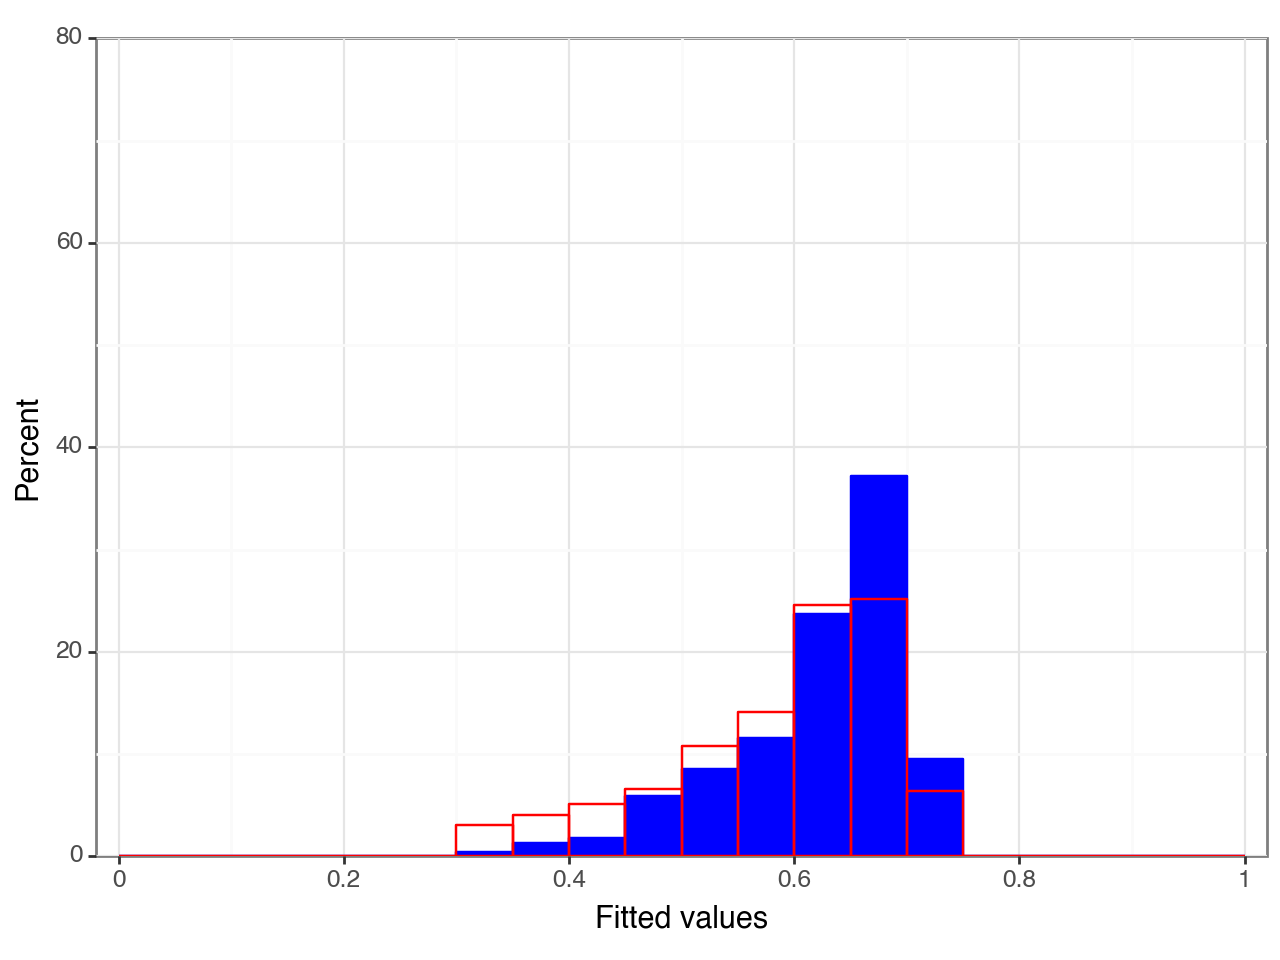

<Figure Size: (640 x 480)>

In [882]:
(
    ggplot(
        df_berlin,
        aes(x="pred_lpmbase", fill="highly_rated", y="stat(count/sum(count)))*100"),
    )
    + geom_histogram(
        df_berlin[df_berlin["highly_rated"] == 1],
        binwidth=0.05,
        color=color[0],
        fill=color[0],
        boundary=0.55,
    )
    + geom_histogram(
        df_berlin[df_berlin["highly_rated"] == 0],
        binwidth=0.05,
        color=color[1],
        fill=None,
        boundary=0.55,
    )
    + ylab("Percent")
    + xlab("Fitted values")
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 1], breaks=np.arange(0, 1.1, 0.2))
    + scale_y_continuous(expand=[0.00, 0.00], limits=[0, 80], breaks=np.arange(0, 81, 20))
    + theme_bw()
)


RHS variable is binary -> 2 values of predicted probability
- probability of highly rated for hotels according to distance change from 0.3 to 0.7


-> the height of each bar shows the proportion of individuals with corresponding predicted probability

- full bars: actual y=1
- empty bars: actual y=0

[No Overlap=perfect fit]

-> the proportion of individuals with prediction 0.55 is larger among those who rated highly

-> the model predicts higher probability of rated highly for those who do rated highly

(b) Rich LPM (predicted values from LPM with many covariates)

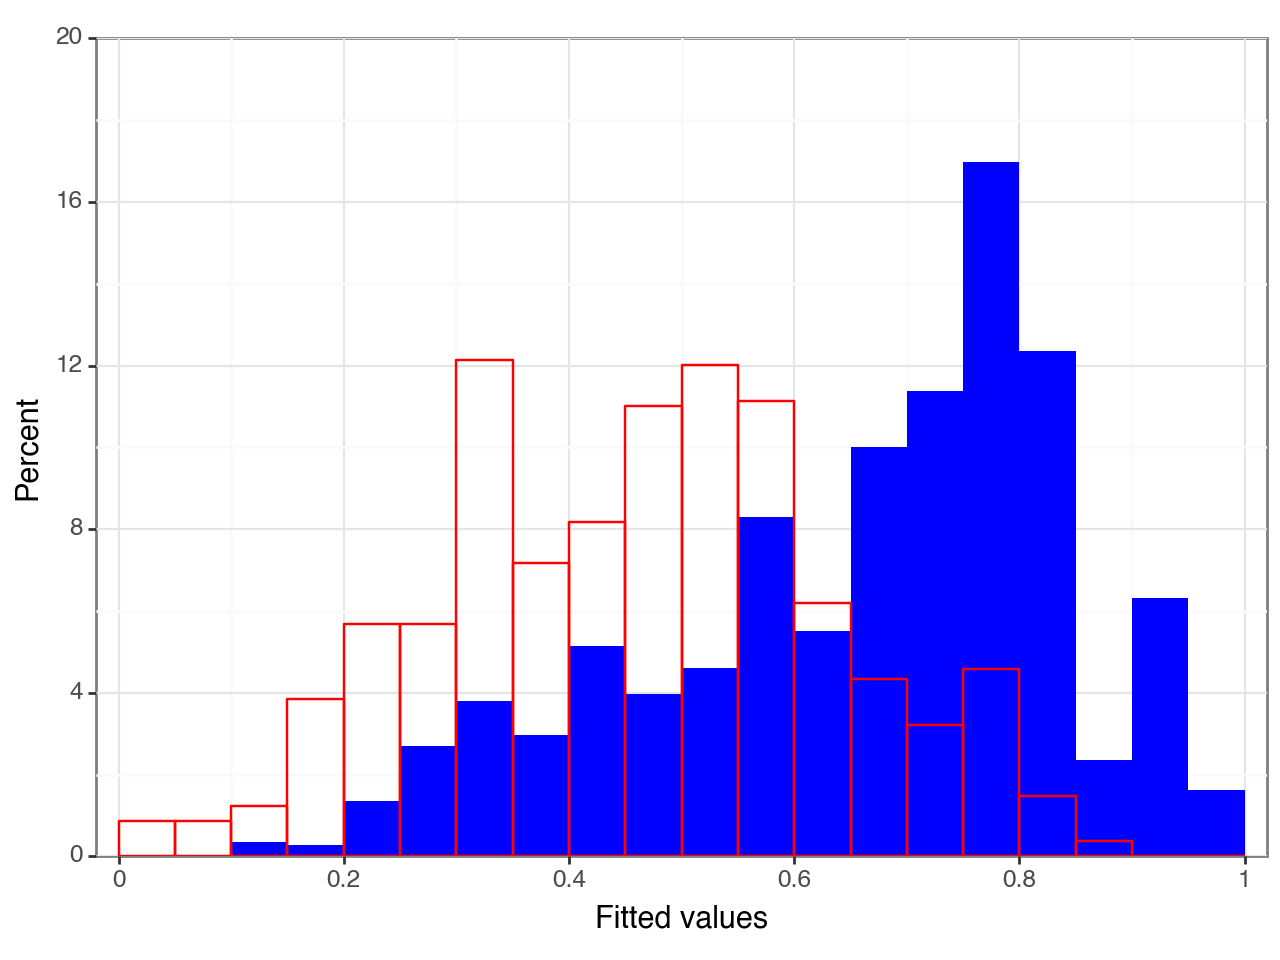

<Figure Size: (640 x 480)>

In [883]:
g5 = (
    ggplot(
        df_berlin,
        aes(x="pred_lpm", fill="highly_rated", y="stat(count/sum(count)))*100"),
    )
    + geom_histogram(
        df_berlin[df_berlin["highly_rated"] == 1],
        binwidth=0.05,
        # color="blue",
        fill=color[0],
        boundary=0.55,
    )
    + geom_histogram(
        df_berlin[df_berlin["highly_rated"] == 0],
        binwidth=0.05,
        color=color[1],
        fill=None,
        boundary=0.55,
    )
    + ylab("Percent")
    + xlab("Fitted values")
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 1], breaks=np.arange(0, 1.1, 0.2))
    + scale_y_continuous(expand=[0.00, 0.00], limits=[0, 20], breaks=np.arange(0, 21, 4))
    + theme_bw()
)
g5

#### Comparing probability models – mean and median

In [884]:
df_berlin.groupby("highly_rated")[
    ["pred_lpmbase", "pred_lpm", "pred_logit", "pred_probit"
]].mean().round(3)

,pred_lpmbase,pred_lpm,pred_logit,pred_probit
highly_rated,,,,
0.0,0.587,0.455,0.448,0.453
1.0,0.621,0.706,0.711,0.714


We cannot interpret $R^2$ as before because the dependent variable is not quantitative

-> use 
- pseudo-$R^2$ for logit and probit
- Brier score for all $Brier = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i^P -y_i)^2$
- log-loss for all (better fit means snaller (less negative) log-loss

In [885]:
from sklearn.metrics import r2_score, mean_squared_error, log_loss

# Assuming you have a DataFrame named 'df_berlin' and you want to predict 'highly_rated'
# Fit logistic regression model
logit_model = sm.Logit(df_berlin["highly_rated"], sm.add_constant(df_berlin[["stars"]]))
logit_result = logit_model.fit()

probit_model = sm.Probit(df_berlin["highly_rated"], sm.add_constant(df_berlin[["stars"]]))
probit_result = probit_model.fit()

pd.DataFrame(
    {
        "R-squared": [
            lpm3.rsquared,
            r2_score(df_berlin["highly_rated"], df_berlin["pred_logit"]),
            r2_score(df_berlin["highly_rated"], df_berlin["pred_probit"]),
        ],
        "Brier-score": [
            mean_squared_error(df_berlin["highly_rated"], df_berlin["pred_lpm"]),
            mean_squared_error(df_berlin["highly_rated"], df_berlin["pred_logit"]),
            mean_squared_error(df_berlin["highly_rated"], df_berlin["pred_probit"]),
        ],
        "Pseudo R-squared": [np.nan, logit_result.prsquared, probit_result.prsquared],
        "Log-loss": [
            -1 * log_loss(df_berlin["highly_rated"], df_berlin["pred_lpm"]),
            -1 * log_loss(df_berlin["highly_rated"], df_berlin["pred_logit"]),
            -1 * log_loss(df_berlin["highly_rated"], df_berlin["pred_probit"]),
        ],
    },
    index=["LPM", "Logit", "Probit"],
).T.round(3)

Optimization terminated successfully.
         Current function value: 0.555959
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.554731
         Iterations 5


,LPM,Logit,Probit
R-squared,0.251,0.258,0.259
Brier-score,0.179,0.177,0.177
Pseudo R-squared,NaN,0.170,0.172
Log-loss,-0.634,-0.523,-0.522


The ranking stays the same:
- Logit and probit provide predictions of same quality and both better than LPM
- but small differences (still better to use logit and probit)

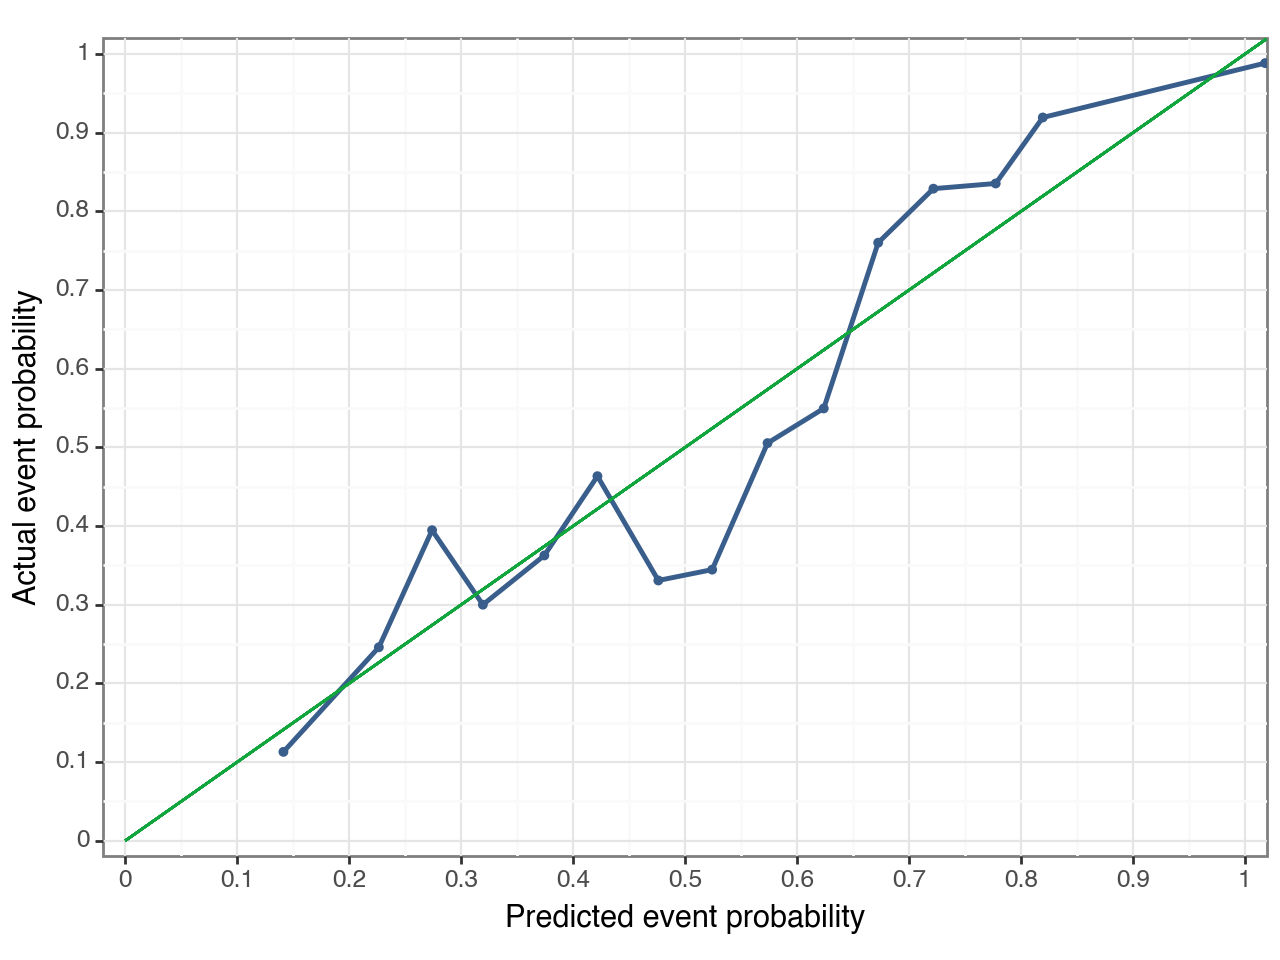

<Figure Size: (640 x 480)>

In [886]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


create_calibration_plot(
    df_berlin,
    file_name="Assignment2-calib-logit",
    prob_var="pred_lpm",
    actual_var="highly_rated",
    breaks=np.array(
        [
            0,
            0.2,
            0.25,
            0.3,
            0.35,
            0.4,
            0.45,
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            1.5,
        ]
    ),
)

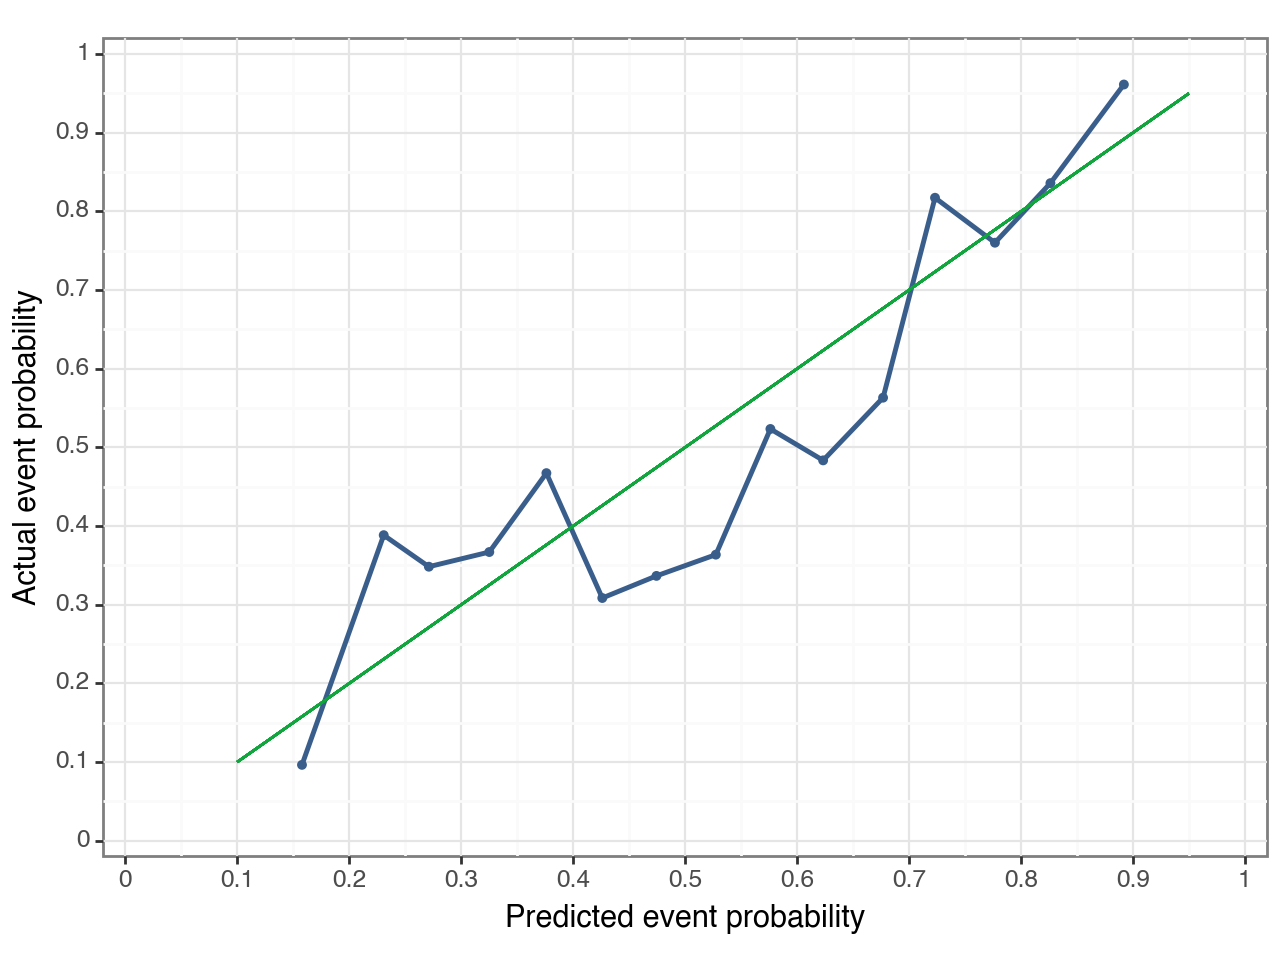

<Figure Size: (640 x 480)>

In [887]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


create_calibration_plot(
    df_berlin,
    file_name="Assignment2-calib-logit",
    prob_var="pred_logit",
    actual_var="highly_rated",
    breaks=np.array(
        [
            0.1,
            0.2,
            0.25,
            0.3,
            0.35,
            0.4,
            0.45,
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            0.95,
        ]
    ),
)

Both LPM and logit predictions are slightly calibrated -> both calibration stay nearly close to the 45 degree line

Conclusions: 
* As hotels move away from the center and their star numbers decrease, their highly rated rates decrease. Additionally, as the hotel's price increases and discounts are offered, the likelihood of it being highly rated also increases.

In [888]:
df_sum = df_berlin[["pred_lpmbase", "pred_lpm", "pred_logit", "pred_probit"]].copy()

In [889]:
for i in range(df_sum.shape[0]):
    for j in range(df_sum.shape[1]):
        if df_sum.iloc[i, j] > 0.5:
            df_sum.iloc[i, j] = 1
        else:
            df_sum.iloc[i, j] = 0


In [890]:
pd.crosstab(df_sum.iloc[:, 0], df_berlin["highly_rated"], normalize="all")

highly_rated,0.0,1.0
pred_lpmbase,,
0.0,0.074217,0.057349
1.0,0.318072,0.550361


In [891]:
for j in range(df.shape[1]):
    print(pd.crosstab(df.iloc[:, j], df_berlin["highly_rated"], normalize="all"))
    print(pd.crosstab(df.iloc[:, j], df_berlin["highly_rated"], normalize="columns"))

highly_rated             0.0       1.0
addresscountryname                    
Greece              0.003855  0.000000
Netherlands         0.388434  0.607711
highly_rated             0.0  1.0
addresscountryname               
Greece              0.009828  0.0
Netherlands         0.990172  1.0
highly_rated        0.0       1.0
city_actual                      
Acharnes       0.003855  0.000000
Amsterdam      0.338313  0.538313
Badhoevedorp   0.005301  0.009157
Diemen         0.000964  0.002410
Duivendrecht   0.000482  0.002410
Halfweg        0.000482  0.000000
Hoofddorp      0.021205  0.025542
Lijnden        0.000000  0.004337
Schiphol       0.012530  0.011566
Schiphol-Rijk  0.004819  0.009157
Zwanenburg     0.004337  0.004819
highly_rated        0.0       1.0
city_actual                      
Acharnes       0.009828  0.000000
Amsterdam      0.862408  0.885805
Badhoevedorp   0.013514  0.015067
Diemen         0.002457  0.003965
Duivendrecht   0.001229  0.003965
Halfweg        0.001229  0.0

In [892]:
import os

df_berlin = pd.read_csv("Assignment2.csv")

In [893]:
df_berlin["accommodation_type"] = df_berlin["accommodation_type"].astype("category")

In [894]:
y, X = dmatrices(
    "highly_rated ~ distance + stars + price + rating_reviewcount + offer + scarce_room + accommodation_type",
    df_berlin,
)


In [895]:
logit = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.522734
         Iterations 7


In [896]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           highly_rated   No. Observations:                 2075
Model:                          Logit   Df Residuals:                     2064
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2195
Time:                        00:59:06   Log-Likelihood:                -1084.7
converged:                       True   LL-Null:                       -1389.8
Covariance Type:            nonrobust   LLR p-value:                1.170e-124
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.2486      0.489     -8.680      0.000      -5.208      -3.289
accommodation_type[T.Apartment]     2.4380      0.692      3.525      0.000       1.082       3.793
accommodation_type[T.Hostel]        0.9043      0.401      2.257      0.024       0.119       1.690
accommodation_type[T.Hotel]         0.1960      0.332      0.590      0.555      -0.455       0.847
accommodation_type[T.Pension]      -0.7296      0.419     -1.742      0.081      -1.550       0.091
distance                           -0.1810      0.039     -4.699      0.000      -0.256      -0.105
stars                               1.2523      0.101     12.455      0.000       1.055       1.449
price                               0.0061      0.001      5.022      0.000       0.004       0.008
rating_reviewcount                 -0.0001      0.000     -0.723      0.470      -0.001       0.000
offer                               0.3613      0.120      3.023      0.003       0.127       0.596
scarce_room                        -0.4895      0.138     -3.536      0.000      -0.761      -0.218
===================================================================================================
"""

In [897]:
df_berlin["bx_logit"] = np.asarray(X).dot(logit.params)

In [898]:
df_berlin["Logit"] = logistic.cdf(df_berlin["bx_logit"])

In [899]:
probit = sm.Probit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.521632
         Iterations 7


In [900]:
probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:           highly_rated   No. Observations:                 2075
Model:                         Probit   Df Residuals:                     2064
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2212
Time:                        00:59:06   Log-Likelihood:                -1082.4
converged:                       True   LL-Null:                       -1389.8
Covariance Type:            nonrobust   LLR p-value:                1.225e-125
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.5328      0.294     -8.615      0.000      -3.109      -1.957
accommodation_type[T.Apartment]     1.4072      0.379      3.718      0.000       0.665       2.149
accommodation_type[T.Hostel]        0.5189      0.244      2.125      0.034       0.040       0.998
accommodation_type[T.Hotel]         0.1007      0.206      0.489      0.625      -0.303       0.504
accommodation_type[T.Pension]      -0.4188      0.247     -1.692      0.091      -0.904       0.066
distance                           -0.1055      0.023     -4.630      0.000      -0.150      -0.061
stars                               0.7493      0.058     12.929      0.000       0.636       0.863
price                               0.0036      0.001      5.459      0.000       0.002       0.005
rating_reviewcount              -8.297e-05      0.000     -0.779      0.436      -0.000       0.000
offer                               0.2378      0.071      3.357      0.001       0.099       0.377
scarce_room                        -0.2882      0.083     -3.478      0.001      -0.451      -0.126
===================================================================================================
"""

In [901]:
df_berlin["bx_probit"] = np.asarray(X).dot(probit.params)

In [902]:
df_berlin["Probit"] = norm.cdf(df_berlin["bx_probit"])

In [903]:
df_berlin_plot = pd.melt(
    df_berlin[["bx_logit", "Logit", "Probit"]],
    id_vars=["bx_logit"],
    value_vars=["Logit", "Probit"],
)

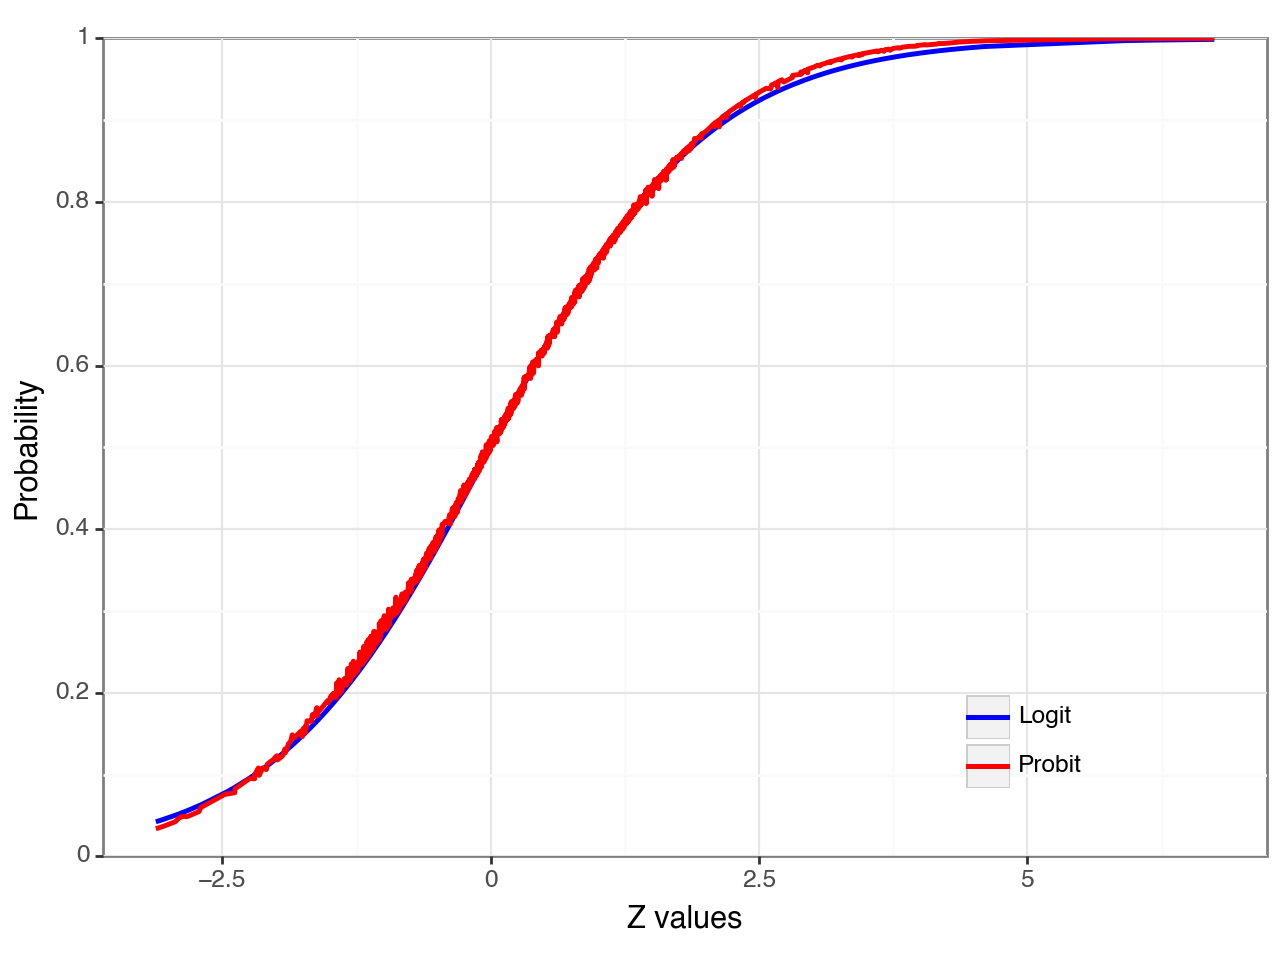

<Figure Size: (640 x 480)>

In [904]:
g6 = (
    ggplot(data=df_berlin_plot)
    + geom_line(aes(x="bx_logit", y="value", color="variable"), size=1)
    + ylab("Probability")
    + xlab("Z values")
    + scale_color_manual(values=color[0:2], name=" ", labels=("Logit", "Probit"))
    + scale_y_continuous(expand=[0.00, 0.00], limits=[0, 1], breaks=np.arange(0, 1.1, 0.2))
    + theme_bw()
    + theme(
        legend_position=(0.8, 0.25),
        legend_direction="vertical",
        legend_background=element_blank(),
    )
)
g6